# Explore here

In [2]:
!pip install -r "/workspaces/RegLinReg/requirements.txt"


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import timeit
import pickle
import matplotlib.pyplot as plt

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import f1_score, make_scorer, mean_squared_error, r2_score, mean_absolute_percentage_error

In [4]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv"
df = pd.read_csv(url)

In [5]:
df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [67]:
df.columns

Index(['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct',
       '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop',
       '30-39', '30-39 y/o % of total pop',
       ...
       'Black-alone pop_per_1000', 'White-alone pop_per_1000',
       'Native American/American Indian-alone pop_per_1000',
       'Asian-alone pop_per_1000',
       'Hawaiian/Pacific Islander-alone pop_per_1000',
       'Black-alone pop_heart_disease_per_1000',
       'White-alone pop_heart_disease_per_1000',
       'Native American/American Indian-alone pop_heart_disease_per_1000',
       'Asian-alone pop_heart_disease_per_1000',
       'Hawaiian/Pacific Islander-alone pop_heart_disease_per_1000'],
      dtype='object', length=116)

In [7]:
df.describe()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
count,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,...,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,30401.640764,1.041894e+05,1.274030e+04,11.871051,1.336798e+04,12.694609,1.446933e+04,12.283979,1.391649e+04,11.751535,...,5827.242357,13.073503,12.088089,14.053726,9326.577707,3.446242,3.207516,3.710478,2466.234076,4.635350
std,15150.559265,3.335834e+05,4.180730e+04,2.124081,4.228439e+04,1.815044,4.957773e+04,3.126297,4.899095e+04,1.696599,...,15720.551934,2.724351,2.622948,2.824828,29754.601185,0.568059,0.527740,0.613069,7730.422067,1.510447
min,1001.000000,8.800000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.100000e+01,6.092789,...,7.000000,6.100000,5.500000,6.700000,11.000000,1.800000,1.700000,1.900000,3.000000,1.000000
25%,18180.500000,1.096325e+04,1.280500e+03,10.594639,1.374500e+03,11.674504,1.263750e+03,10.496774,1.232750e+03,10.689322,...,815.000000,11.200000,10.300000,12.100000,1187.750000,3.100000,2.900000,3.300000,314.750000,3.000000
50%,29178.000000,2.580050e+04,3.057000e+03,11.802727,3.274000e+03,12.687422,3.108000e+03,11.772649,3.000500e+03,11.580861,...,1963.500000,12.800000,11.800000,13.800000,2743.000000,3.400000,3.200000,3.700000,718.000000,5.000000
75%,45081.500000,6.791300e+04,8.097000e+03,12.951840,8.822250e+03,13.659282,8.976250e+03,13.182260,8.314250e+03,12.639379,...,4727.000000,14.800000,13.700000,15.900000,6679.250000,3.800000,3.500000,4.100000,1776.250000,6.000000
max,56045.000000,1.010552e+07,1.208253e+06,25.460677,1.239139e+06,23.304372,1.557073e+06,37.570198,1.501844e+06,22.225129,...,434075.000000,25.600000,24.200000,27.000000,952335.000000,6.200000,5.800000,6.600000,237766.000000,6.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [9]:
df.shape

(3140, 108)

In [10]:
df.isnull().sum()

fips                      0
TOT_POP                   0
0-9                       0
0-9 y/o % of total pop    0
19-Oct                    0
                         ..
CKD_prevalence            0
CKD_Lower 95% CI          0
CKD_Upper 95% CI          0
CKD_number                0
Urban_rural_code          0
Length: 108, dtype: int64

In [11]:
df_concat=df.select_dtypes(include="O")
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   COUNTY_NAME  3140 non-null   object
 1   STATE_NAME   3140 non-null   object
dtypes: object(2)
memory usage: 49.2+ KB


In [12]:
df.drop(["COUNTY_NAME","STATE_NAME"], axis=1, inplace=True)

EDA

<Axes: >

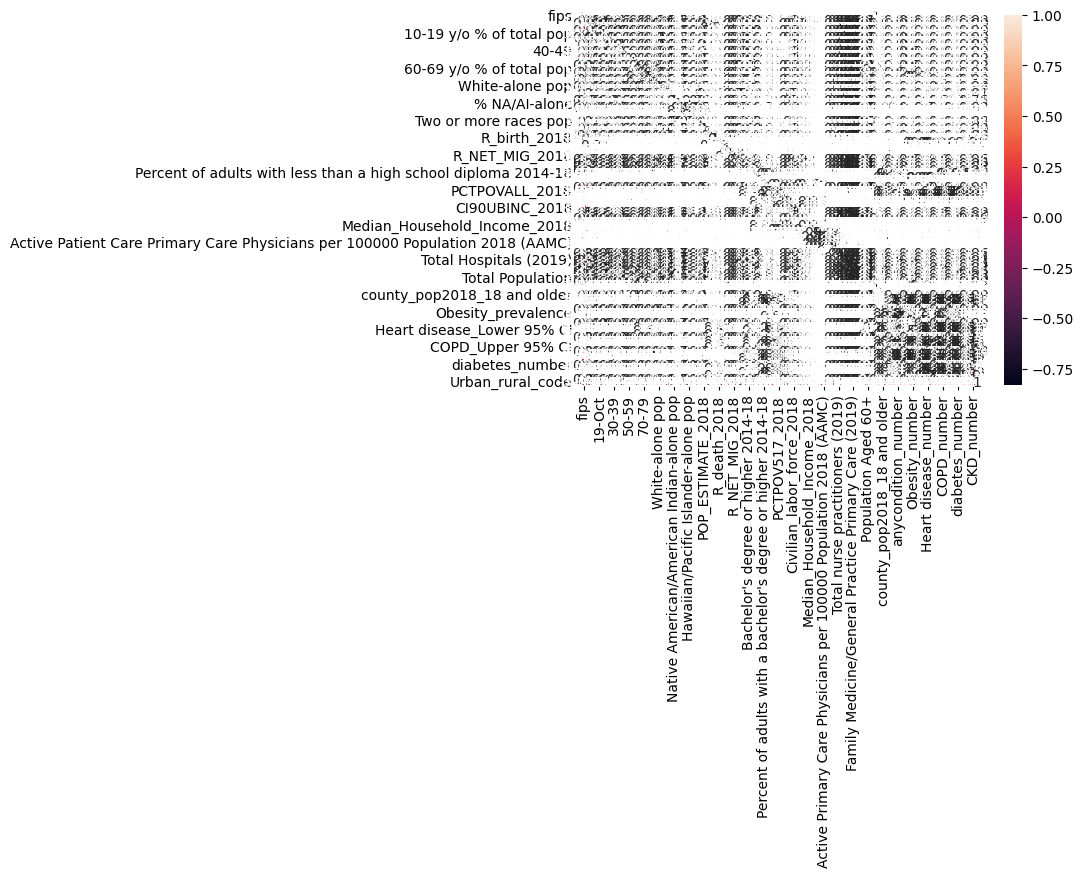

In [13]:
sns.heatmap(df.corr(), annot=True)

In [14]:
columns_list = df.columns.tolist()
print(columns_list)


['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct', '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop', '30-39', '30-39 y/o % of total pop', '40-49', '40-49 y/o % of total pop', '50-59', '50-59 y/o % of total pop', '60-69', '60-69 y/o % of total pop', '70-79', '70-79 y/o % of total pop', '80+', '80+ y/o % of total pop', 'White-alone pop', '% White-alone', 'Black-alone pop', '% Black-alone', 'Native American/American Indian-alone pop', '% NA/AI-alone', 'Asian-alone pop', '% Asian-alone', 'Hawaiian/Pacific Islander-alone pop', '% Hawaiian/PI-alone', 'Two or more races pop', '% Two or more races', 'POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018', 'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018', 'Less than a high school diploma 2014-18', 'High school diploma only 2014-18', "Some college or associate's degree 2014-18", "Bachelor's degree or higher 2014-18", 'Percent of adults with les

In [15]:
corr_matrix = df.corr().abs()

upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]

heart_disease_columns = ['Heart disease_Lower 95% CI', 'Heart disease_Upper 95% CI', 'Heart disease_number'] 

to_drop = [column for column in to_drop if column not in heart_disease_columns]

df_reduced = df.drop(to_drop, axis=1)

print("Dropped columns due to high correlation:", to_drop)


Dropped columns due to high correlation: ['0-9', '19-Oct', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+', 'White-alone pop', 'Two or more races pop', 'POP_ESTIMATE_2018', 'GQ_ESTIMATES_2018', 'R_NET_MIG_2018', 'Less than a high school diploma 2014-18', 'High school diploma only 2014-18', "Some college or associate's degree 2014-18", "Bachelor's degree or higher 2014-18", 'POVALL_2018', 'PCTPOV017_2018', 'PCTPOV517_2018', 'CI90LBINC_2018', 'CI90UBINC_2018', 'Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018', 'Median_Household_Income_2018', 'Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)', 'Active Primary Care Physicians per 100000 Population 2018 (AAMC)', 'Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)', 'Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)', 'Total nurse practitioners (2019)', 'Total physician assistants (2019)', 'Total Hospitals (2019)', 'Internal Medicine Primary Care 

In [16]:
df_reduced.shape

(3140, 47)

In [17]:
corr_matrix1 = df_reduced.corr()

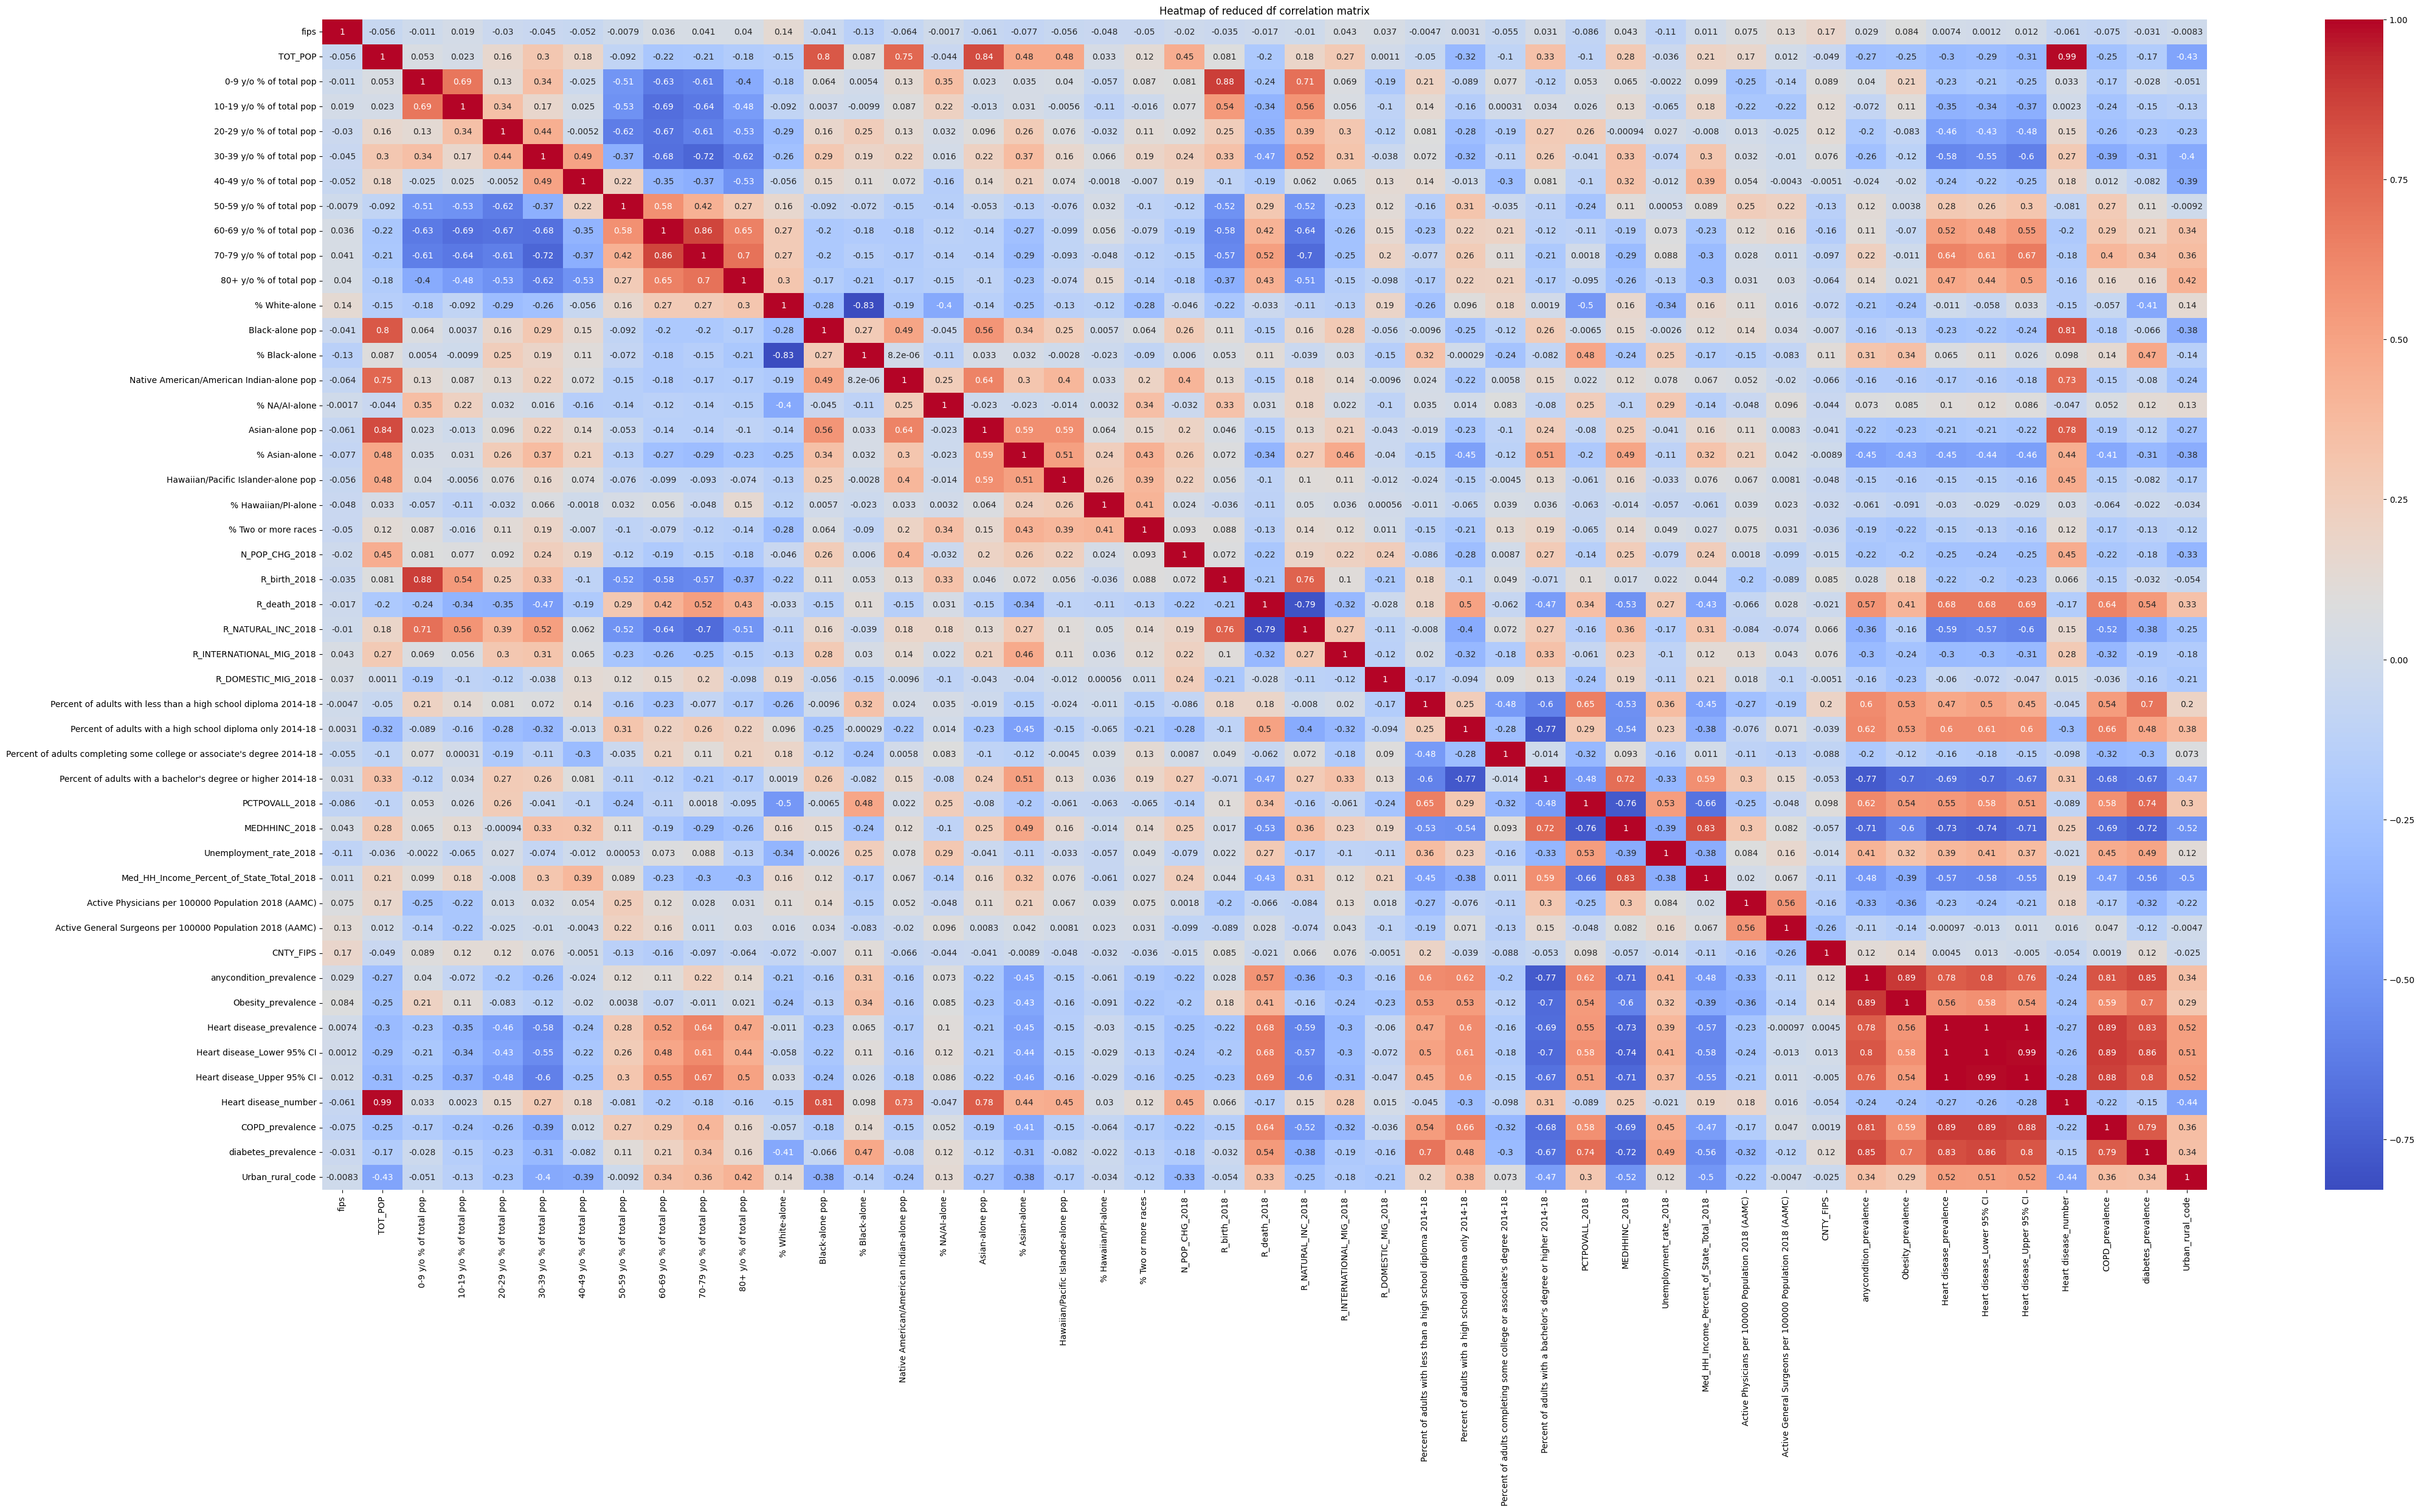

In [18]:
plt.figure(figsize=(50, 25))
sns.heatmap(corr_matrix1, annot=True, cmap="coolwarm",)
plt.title("Heatmap of reduced df correlation matrix")
plt.show()

First, i tried to do a heatmap with all the values of the DF but since it was too large I took out the variables that could be repetitive looking at the correlation and elimiating one of two variables that shared a high correlation.

In [19]:
print(df['Heart disease_number'].describe())


count      3140.000000
mean       5597.593312
std       15615.285499
min           7.000000
25%         798.500000
50%        1814.500000
75%        4376.000000
max      434790.000000
Name: Heart disease_number, dtype: float64


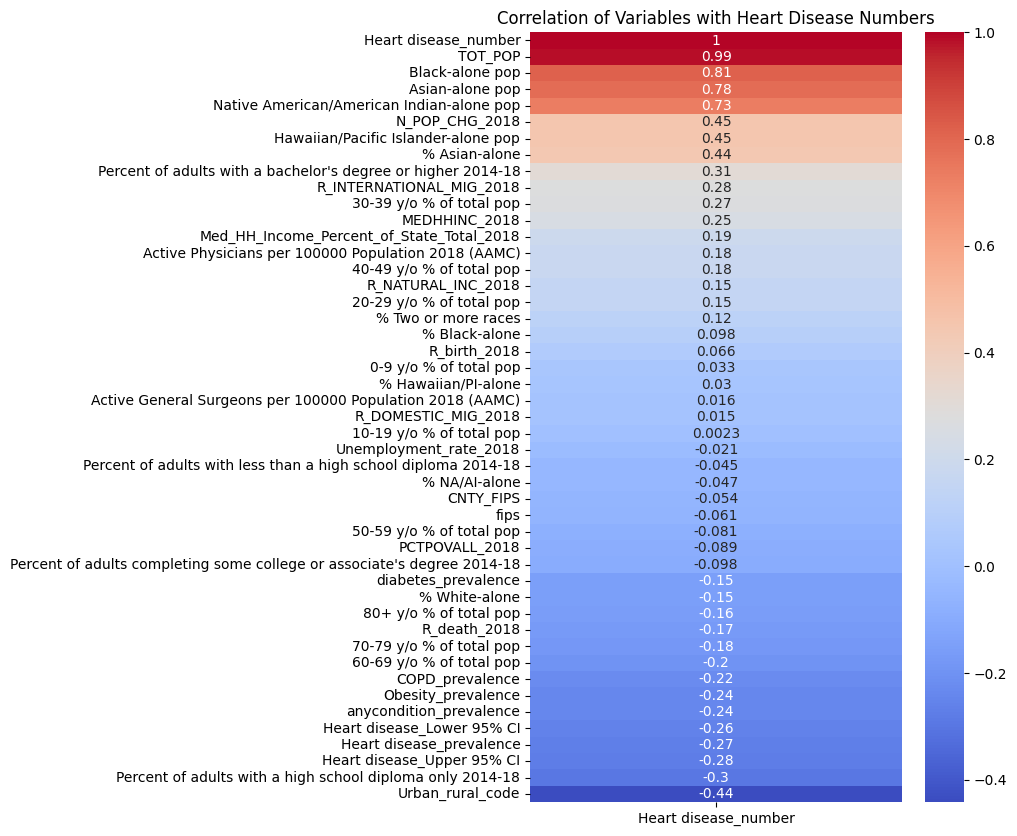

In [20]:
import seaborn as sns
plt.figure(figsize=(6, 10))
sns.heatmap(df_reduced.corr()[['Heart disease_number']].sort_values(by='Heart disease_number', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation of Variables with Heart Disease Numbers')
plt.show()


Since Heart disease is going to be the main variable i wanted to see its correlation with all the other variables in the reduced DF

In [21]:
df_reduced.columns

Index(['fips', 'TOT_POP', '0-9 y/o % of total pop', '10-19 y/o % of total pop',
       '20-29 y/o % of total pop', '30-39 y/o % of total pop',
       '40-49 y/o % of total pop', '50-59 y/o % of total pop',
       '60-69 y/o % of total pop', '70-79 y/o % of total pop',
       '80+ y/o % of total pop', '% White-alone', 'Black-alone pop',
       '% Black-alone', 'Native American/American Indian-alone pop',
       '% NA/AI-alone', 'Asian-alone pop', '% Asian-alone',
       'Hawaiian/Pacific Islander-alone pop', '% Hawaiian/PI-alone',
       '% Two or more races', 'N_POP_CHG_2018', 'R_birth_2018', 'R_death_2018',
       'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018',
       'Percent of adults with less than a high school diploma 2014-18',
       'Percent of adults with a high school diploma only 2014-18',
       'Percent of adults completing some college or associate's degree 2014-18',
       'Percent of adults with a bachelor's degree or higher 2014-18',
       'PC

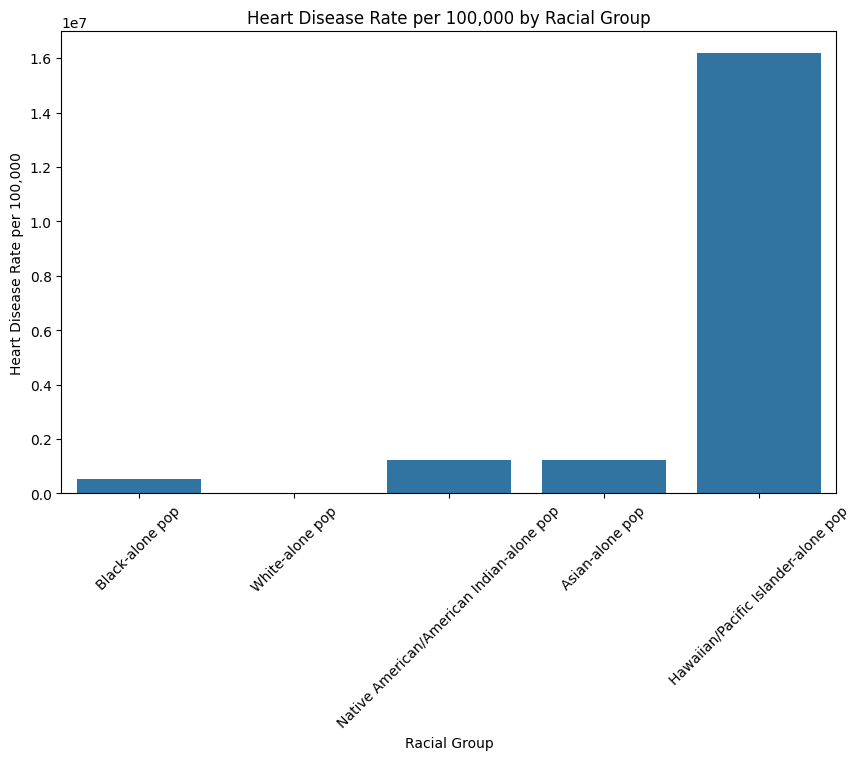

In [22]:

racial_columns = ['Black-alone pop', 'White-alone pop', 'Native American/American Indian-alone pop', 
                  'Asian-alone pop',  'Hawaiian/Pacific Islander-alone pop']


heart_disease_rates = []
for column in racial_columns:
    population = df[column].replace(0, np.nan) 
    rate = (df['Heart disease_number'] / population) 
    heart_disease_rates.append(rate.mean()) 

df_race_heart_disease_rate = pd.DataFrame({
    'Racial Group': racial_columns,
    'Heart Disease Rate per 100,000': heart_disease_rates
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Racial Group', y='Heart Disease Rate per 100,000', data=df_race_heart_disease_rate)
plt.title('Heart Disease Rate per 100,000 by Racial Group')
plt.xlabel('Racial Group')
plt.ylabel('Heart Disease Rate per 100,000')
plt.xticks(rotation=45)
plt.show()


In [23]:

racial_columns = ['Black-alone pop', 'White-alone pop', 'Native American/American Indian-alone pop', 
                  'Asian-alone pop',  'Hawaiian/Pacific Islander-alone pop']

total_population_per_race = df[racial_columns].sum()

print("Total population for each racial group in the dataset:")
print(total_population_per_race)


Total population for each racial group in the dataset:
Black-alone pop                               43803816
White-alone pop                              250131734
Native American/American Indian-alone pop      4145526
Asian-alone pop                               19328639
Hawaiian/Pacific Islander-alone pop             799324
dtype: int64


/tmp/ipykernel_594/3255239287.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Racial Group', y='Heart Disease Cases per 100', data=heart_disease_per_100_df, palette='Set2')


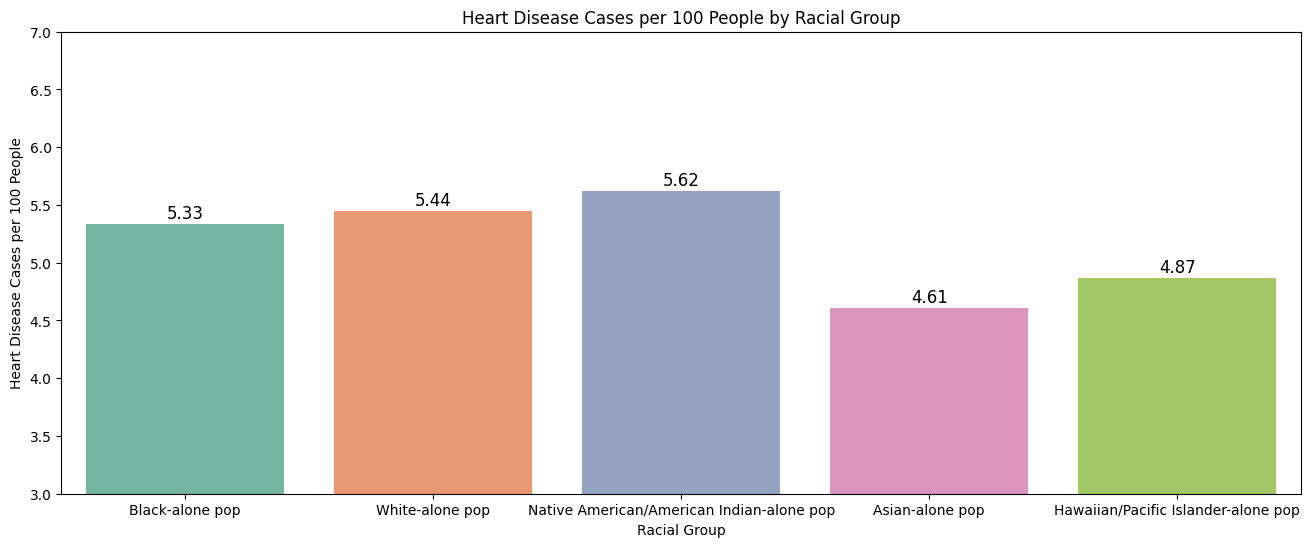

In [63]:
total_heart_disease_per_race = {}
for column in racial_columns:
    total_heart_disease_per_race[column] = (df[column] / df['TOT_POP']) * df['Heart disease_number']

total_heart_disease_per_race = pd.DataFrame(total_heart_disease_per_race).sum()

total_racial_population = df[racial_columns].sum()

heart_disease_per_100 = (total_heart_disease_per_race / total_racial_population) * 100

heart_disease_per_100_df = pd.DataFrame([heart_disease_per_100.values], columns=racial_columns).melt(
    var_name='Racial Group', value_name='Heart Disease Cases per 100')

plt.figure(figsize=(16, 6))
ax = sns.barplot(x='Racial Group', y='Heart Disease Cases per 100', data=heart_disease_per_100_df, palette='Set2')

for index, row in heart_disease_per_100_df.iterrows():
    ax.text(index, row['Heart Disease Cases per 100'] + 0.05, round(row['Heart Disease Cases per 100'], 2), 
            color='black', ha="center", size=12)

plt.ylim(3, 7)

plt.title('Heart Disease Cases per 100 People by Racial Group')
plt.xlabel('Racial Group')
plt.ylabel('Heart Disease Cases per 100 People')

plt.show()

Thought it would be interesting to see how heart disease numbers varies in the different racial groups of the DF

Correlation between Heart Disease and Obesity (filtered): 0.9840981022709061


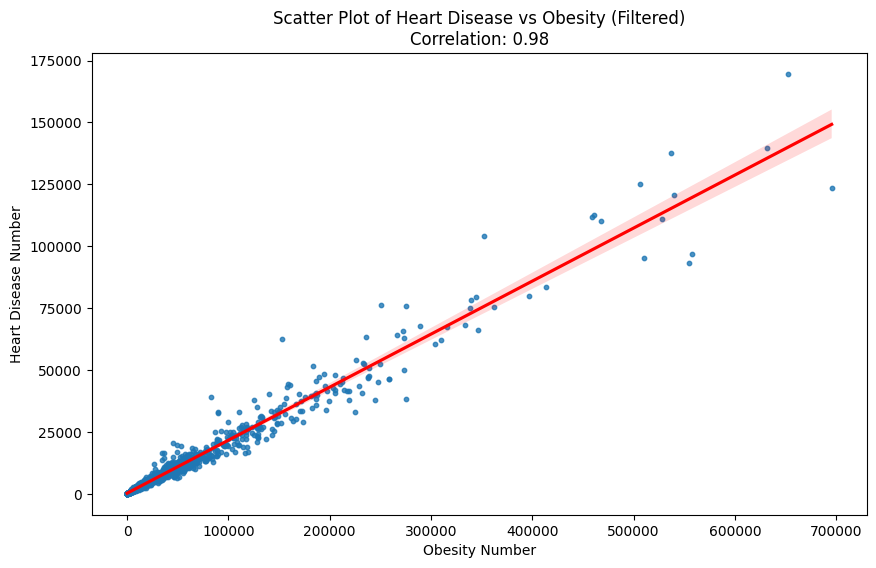

In [70]:
df_filtered = df[(df['Obesity_number'] < 1000000) & (df['Heart disease_number'] < 200000)]

filtered_correlation = df_filtered['Heart disease_number'].corr(df_filtered['Obesity_number'])
print(f"Correlation between Heart Disease and Obesity (filtered): {filtered_correlation}")

plt.figure(figsize=(10, 6))
sns.regplot(x='Obesity_number', y='Heart disease_number', data=df_filtered, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title(f"Scatter Plot of Heart Disease vs Obesity (Filtered)\nCorrelation: {round(filtered_correlation, 2)}")
plt.xlabel('Obesity Number')
plt.ylabel('Heart Disease Number')
plt.show()


Wanted to see how obesity could impact the likeliness of having a heart disease and there seems to be quite a positive corr

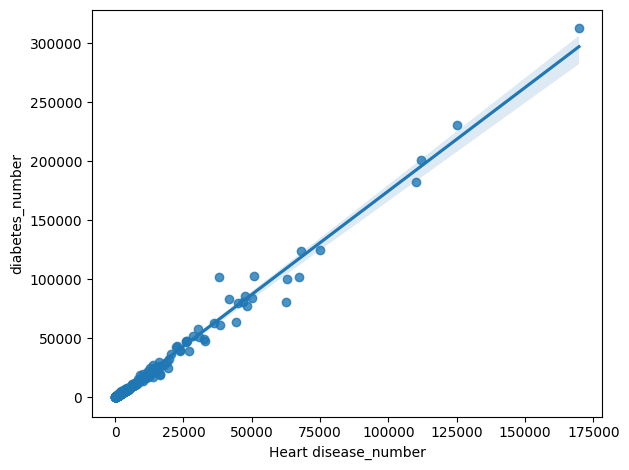

In [24]:
sns.regplot(data=df[df["Heart disease_number"]<200000].sample(500), x="Heart disease_number", y="diabetes_number")
plt.tight_layout()
plt.show()

ML

In [25]:
x = df.drop("Heart disease_number", axis=1)
y = df["Heart disease_number"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
1292,26127,26625,3221,12.097653,3463,13.006573,2922,10.974648,2829,10.625352,...,2314,13.7,12.6,14.9,2823,3.8,3.5,4.1,771,6
2302,42121,51266,5272,10.283619,5751,11.217961,5137,10.020286,5341,10.418211,...,4097,13.1,11.9,14.2,5416,3.5,3.2,3.8,1454,5
761,18133,37779,3915,10.362900,5118,13.547209,6202,16.416528,4363,11.548744,...,2792,12.2,11.2,13.1,3698,2.9,2.7,3.1,871,2
2194,40131,91984,11163,12.135806,12646,13.748043,11595,12.605453,11357,12.346712,...,5716,11.2,10.4,12.0,7913,3.0,2.8,3.2,2118,3
1241,26025,134487,16698,12.416070,17666,13.135842,17281,12.849569,15993,11.891856,...,10002,12.5,11.7,13.4,12987,3.4,3.2,3.6,3490,4


<Axes: ylabel='Frequency'>

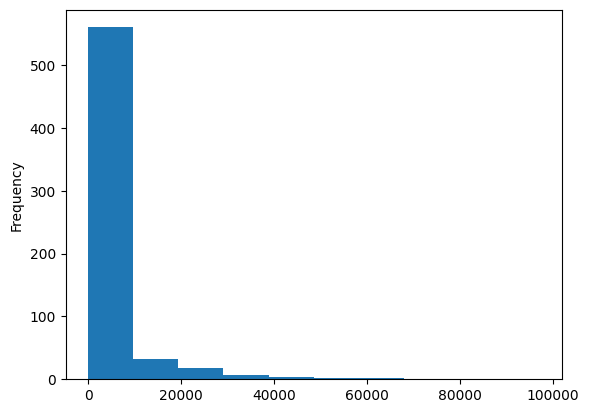

In [26]:
y_test.plot.hist()

<Axes: ylabel='Frequency'>

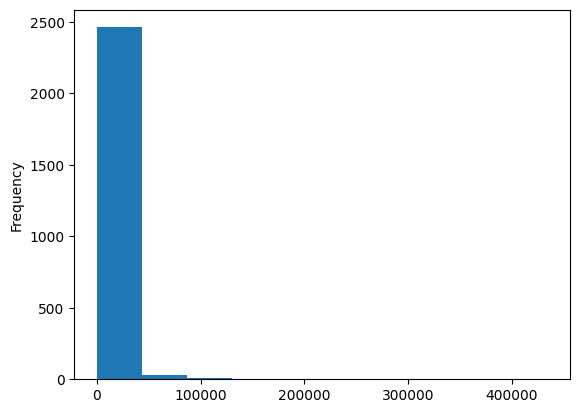

In [27]:
y_train.plot.hist()


In [28]:
x_train.to_csv("x_train.csv")

In [29]:
y_train.to_csv("y_train.csv")

In [30]:
x_test.to_csv("x_test.csv")

In [31]:
y_test.to_csv("y_test.csv")

In [32]:
selection_model = SelectKBest(f_classif, k = 35)
selection_model.fit(x_train, y_train)
ix = selection_model.get_support()
x_train = pd.DataFrame(selection_model.transform(x_train), columns = x_train.columns.values[ix])
x_test = pd.DataFrame(selection_model.transform(x_test), columns = x_test.columns.values[ix])

x_train.head()

,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,...,Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),Total Population,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Obesity_number,COPD_number,diabetes_number,CKD_number
0,26625.0,3221.0,3463.0,2922.0,2829.0,2831.0,3831.0,3860.0,2460.0,1208.0,...,16.042791,54.078829,26317.0,7218.0,20545.0,10213.0,7930.0,2314.0,2823.0,771.0
1,51266.0,5272.0,5751.0,5137.0,5341.0,5880.0,7885.0,8271.0,4801.0,2928.0,...,28.837240,107.146919,52880.0,15253.0,41304.0,19282.0,13713.0,4097.0,5416.0,1454.0
2,37779.0,3915.0,5118.0,6202.0,4363.0,4451.0,5107.0,4349.0,2713.0,1561.0,...,18.759998,49.149727,37543.0,8058.0,30379.0,14283.0,10238.0,2792.0,3698.0,871.0
3,91984.0,11163.0,12646.0,11595.0,11357.0,11444.0,12774.0,10791.0,6736.0,3478.0,...,52.721196,108.754962,90098.0,19479.0,70506.0,33057.0,25735.0,5716.0,7913.0,2118.0
4,134487.0,16698.0,17666.0,17281.0,15993.0,15845.0,17982.0,16909.0,10074.0,6039.0,...,81.034623,273.160542,134327.0,31227.0,103686.0,49754.0,38882.0,10002.0,12987.0,3490.0


In [33]:
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_scal = scaler.transform(x_train)
x_train_scal = pd.DataFrame(x_train_scal, index = x_train.index, columns=x_test.columns)

x_test_scal = scaler.transform(x_test)
x_test_scal = pd.DataFrame(x_test_scal, index = x_test.index, columns=x_test.columns)

x_train_scal.head()

,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,...,Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),Total Population,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Obesity_number,COPD_number,diabetes_number,CKD_number
0,0.002626,0.002666,0.002795,0.001877,0.001876,0.002094,0.002923,0.003786,0.004286,0.003391,...,0.004124,0.003594,0.002597,0.003994,0.002584,0.003535,0.003768,0.005315,0.002953,0.003230
1,0.005064,0.004363,0.004641,0.003299,0.003549,0.004352,0.006027,0.008135,0.008375,0.008218,...,0.007420,0.007129,0.005225,0.008457,0.005206,0.006687,0.006525,0.009422,0.005676,0.006103
2,0.003730,0.003240,0.004130,0.003983,0.002898,0.003294,0.003900,0.004268,0.004728,0.004381,...,0.004824,0.003266,0.003708,0.004461,0.003826,0.004950,0.004868,0.006416,0.003872,0.003651
3,0.009094,0.009239,0.010205,0.007447,0.007555,0.008474,0.009770,0.010619,0.011755,0.009762,...,0.013571,0.007236,0.008908,0.010805,0.008895,0.011475,0.012255,0.013152,0.008298,0.008895
4,0.013300,0.013820,0.014257,0.011098,0.010642,0.011733,0.013758,0.016651,0.017585,0.016950,...,0.020864,0.018186,0.013285,0.017330,0.013086,0.017278,0.018522,0.023026,0.013626,0.014666


In [34]:
start_time = timeit.default_timer()
model = LinearRegression()
model.fit(x_train, y_train)

print("training time", timeit.default_timer()-start_time)

training time 0.015944687999990492


ASSESING MODEL

In [35]:
y_trainpred = model.predict(x_train)
y_trainpred

array([2046.01246543, 3940.79933811, 2356.32511711, ..., 2587.29966808,
        655.29239103,  533.32479943])

In [36]:
y_pred = model.predict(x_test)
y_pred

array([6.98489380e+02, 1.30572748e+04, 1.76115783e+03, 6.93466113e+03,
       1.09687450e+04, 1.39137684e+03, 7.37604274e+02, 1.34624216e+03,
       3.84763981e+02, 7.10365118e+02, 1.28787176e+03, 2.23623192e+02,
       4.28372635e+03, 1.41833468e+03, 9.31557237e+03, 2.49704262e+03,
       5.38551293e+04, 1.20875831e+03, 1.94443186e+03, 4.26671848e+02,
       1.51208092e+03, 6.85007752e+02, 8.40708253e+02, 5.81065779e+02,
       9.83001784e+04, 2.39158404e+03, 8.69610108e+02, 2.12003374e+03,
       8.42698990e+02, 1.81417465e+02, 1.17025992e+03, 1.82587538e+03,
       2.66609610e+03, 3.22822509e+03, 8.70601180e+03, 1.57301545e+03,
       2.61389354e+03, 1.20684640e+03, 8.63194541e+02, 1.75299571e+03,
       1.35397484e+03, 9.06013286e+03, 3.66164984e+02, 1.39035858e+02,
       2.61372951e+03, 7.23104682e+02, 3.39654650e+02, 7.69786730e+03,
       1.06986861e+03, 7.74069258e+02, 1.83718382e+04, 3.23055324e+02,
       1.42496254e+03, 5.46138892e+02, 8.58219174e+03, 7.48180273e+02,
      

In [37]:
print(r2_score(y_train, y_trainpred))

0.9993839061867782


In [38]:
print(r2_score(y_test, y_pred))

0.9978277816200682


In [39]:
print(mean_absolute_percentage_error(y_train, y_trainpred))

0.04954753401460394


In [40]:
print(mean_absolute_percentage_error(y_test, y_pred))

0.04776567279546529


In [41]:
print(mean_squared_error(y_train, y_trainpred)**0.5)

417.2049181191727


In [42]:
print(mean_squared_error(y_test, y_pred)**0.5)

436.03262472007236


In [43]:
lasso_model = Lasso(alpha=0.1, max_iter=300)
lasso_model.fit(x_train.values, y_train.values)
y_pred = lasso_model.predict(x_test.values)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.029e+08, tolerance: 7.097e+07
  model = cd_fast.enet_coordinate_descent(


In [44]:
print(mean_squared_error(y_test, y_pred)**0.5)
print(r2_score(y_test, y_pred))

608.9571081406622
0.995763190646578


In [45]:
Ridge_model = Ridge(alpha=0.1, max_iter=300)
Ridge_model.fit(x_train.values, y_train.values)
y_pred = Ridge_model.predict(x_test.values)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.45199e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [46]:
print(mean_squared_error(y_test, y_pred)**0.5)
print(r2_score(y_test, y_pred))

436.0060389441549
0.9978280465009384


In [47]:

model = RandomForestRegressor()
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}


random = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)

random.fit(x_train, y_train)

random_best = random.best_estimator_

random_best


RandomForestRegressor(max_depth=20, n_estimators=300)

In [48]:
print(mean_absolute_percentage_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

0.04780807780976839
0.9978280465009384
